Examine sample-average methods for nonstationary problems.

Reproduction of Sutton-Barto 2018 p.27-33

In [47]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [182]:
class Env:
    def __init__(self, arms):
        self.means = np.random.normal(size=arms)
        
    def __call__(self, action):
        reward = np.random.normal(loc=self.means[action])
        self.drift()
        return reward
        
    def drift(self):
        for i in range(len(self.means)):
            self.means[i] += np.random.normal(loc=0, scale=0.01)

In [226]:
def sample_average(timesteps, alpha=None, eps=None):
    env = Env(arms=k)
    estimates = np.zeros(shape=k)
    mean_rewards = []
    mean_is_optimals = []
    for i in range(timesteps):
        if eps is None or np.random.binomial(n=1, p=1-eps):
            action = np.argmax(estimates)
        else:
            action = np.random.randint(estimates.shape[0])
        reward = env(action)
        step_size = 1/(i+1) if alpha is None else alpha
        estimates[action] += step_size * (reward - estimates[action])
        is_optimal = int(action == np.argmax(env.means))
        if len(mean_rewards) > 1:
            mean_reward = mean_rewards[-1] + 1/(i+1) * (reward - mean_rewards[-1])
            mean_is_optimal = mean_is_optimals[-1] + 1/(i+1) * (is_optimal - mean_is_optimals[-1])
        else:
            mean_reward = reward
            mean_is_optimal = is_optimal
        mean_rewards.append(mean_reward)
        mean_is_optimals.append(mean_is_optimal)
    return mean_rewards, mean_is_optimals

In [238]:
def plot_results(method):
    mean_rewards, mean_is_optimals = method(timesteps)    
    plt.figure(figsize=(15, 5))
    plt.plot(mean_rewards)
    plt.figure(figsize=(15, 5))
    plt.ylim(0, 1)
    plt.plot(mean_is_optimals)

In [243]:
def test_method(method):
    final_rewards = []
    final_is_optimals = []
    for i in range(repeats):
        mean_rewards, mean_is_optimals = method(timesteps)
        final_reward, final_is_optimal = mean_rewards[-1], mean_is_optimals[-1]
        final_rewards.append(final_reward)
        final_is_optimals.append(final_is_optimal)
    print(np.array(final_rewards).mean())
    print(np.array(final_is_optimals).mean())

In [244]:
k = 10  # number of arms
timesteps = 10000
repeats = 25

# Usual sample-average method with drift

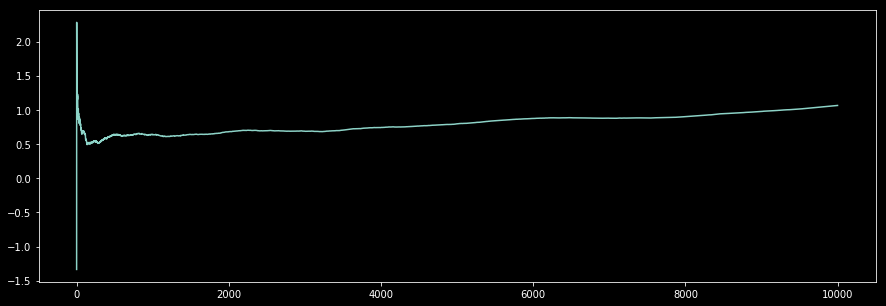

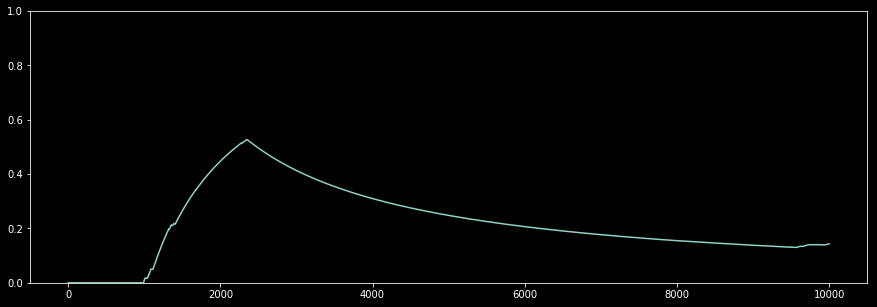

In [245]:
plot_results(sample_average)

In [246]:
test_method(sample_average)

1.23236940748
0.414776


# Constant step-size method with drift

In [247]:
const_step_size = lambda timesteps: sample_average(timesteps, alpha=0.1)

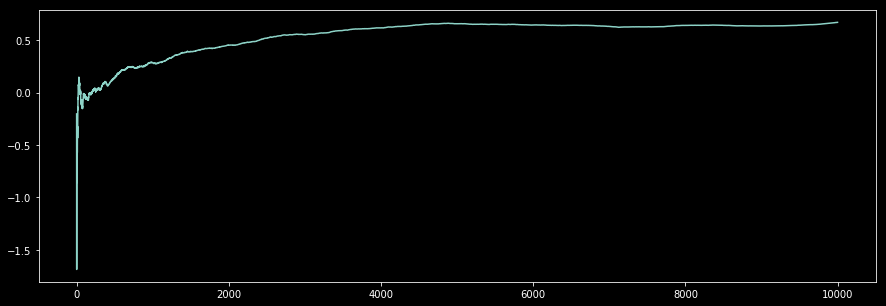

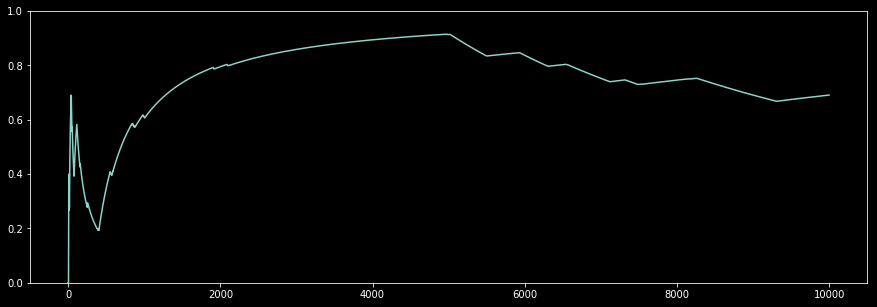

In [248]:
plot_results(const_step_size)

In [249]:
test_method(const_step_size)

1.83689007043
0.59682


# Eps-greedy sample-average method with drift

In [254]:
method = lambda timesteps: sample_average(timesteps, eps=0.1)

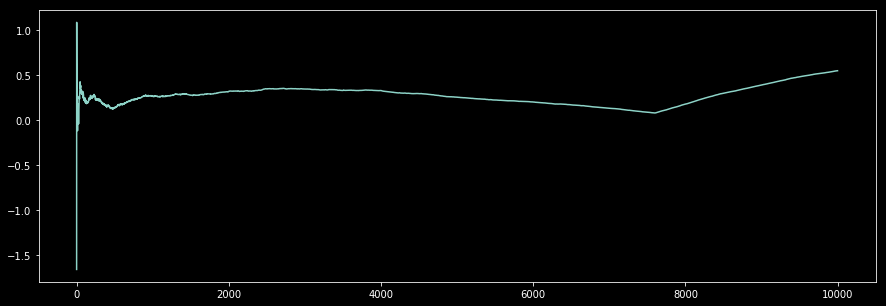

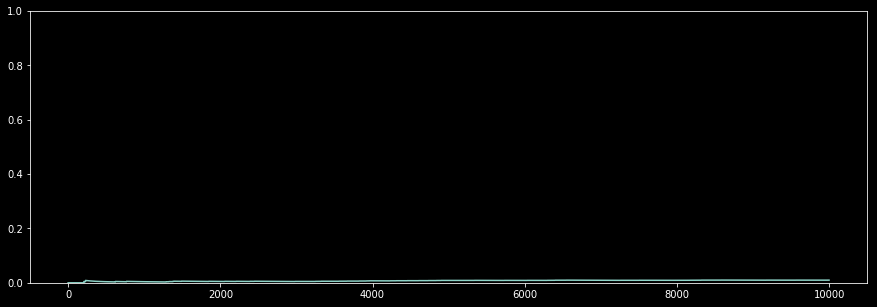

In [255]:
plot_results(method)

In [256]:
test_method(method)

0.998884171544
0.284724


# Eps-greedy, constant step size sample-average method with drift

In [257]:
method = lambda timesteps: sample_average(timesteps, eps=0.1)

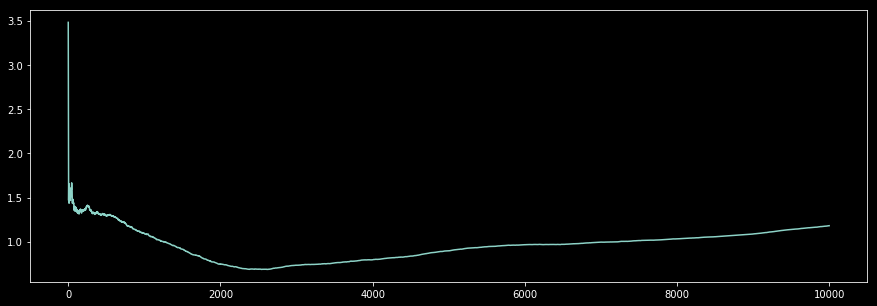

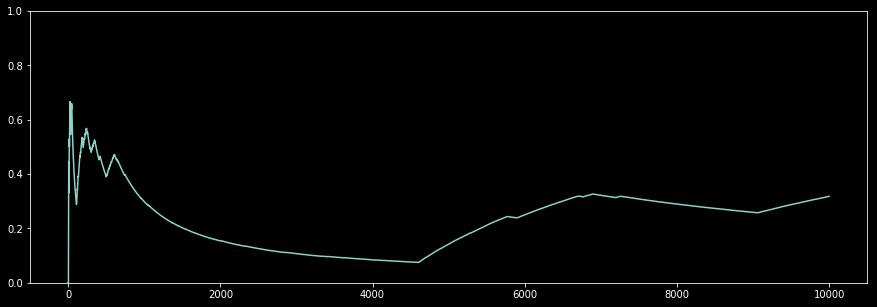

In [258]:
plot_results(method)

In [259]:
test_method(method)

1.22504348014
0.4686


Basically constant step size makes recent experiences more important thus it performs better.